In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from sklearn.datasets import make_classification

In [125]:
X,y=make_classification(n_samples=1000,n_classes=2,n_clusters_per_class=2,n_features=2,n_redundant=0)

<Axes: xlabel='x1', ylabel='x2'>

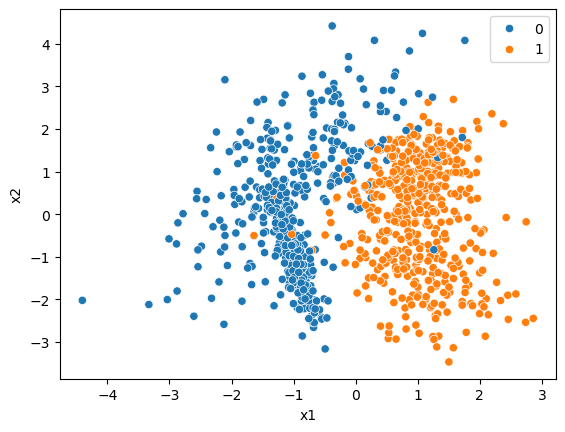

In [126]:
df = pd.DataFrame(X, columns=["x1", "x2"])
sns.scatterplot(data=df, x="x1", y="x2",hue=y)

In [127]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [128]:
from sklearn.svm import SVC

In [129]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       121
           1       0.93      0.95      0.94       129

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[112   9]
 [  7 122]]


In [131]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']
gamma=['scale','auto']
C=[100,10,1.0,0.1,0.01]

params=dict(kernel=kernel,gamma=gamma,C=C)

In [132]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(SVC(),param_grid=params,cv=5,verbose=3,refit=True)



In [133]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .C=100, gamma=scale, kernel=linear;, score=0.960 total time=   0.0s
[CV 2/5] END .C=100, gamma=scale, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END .C=100, gamma=scale, kernel=linear;, score=0.947 total time=   0.0s
[CV 4/5] END .C=100, gamma=scale, kernel=linear;, score=0.967 total time=   0.0s
[CV 5/5] END .C=100, gamma=scale, kernel=linear;, score=0.940 total time=   0.0s
[CV 1/5] END ...C=100, gamma=scale, kernel=poly;, score=0.953 total time=   0.0s
[CV 2/5] END ...C=100, gamma=scale, kernel=poly;, score=0.987 total time=   0.0s
[CV 3/5] END ...C=100, gamma=scale, kernel=poly;, score=0.947 total time=   0.0s
[CV 4/5] END ...C=100, gamma=scale, kernel=poly;, score=0.953 total time=   0.0s
[CV 5/5] END ...C=100, gamma=scale, kernel=poly;, score=0.940 total time=   0.0s
[CV 1/5] END ....C=100, gamma=scale, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END ....C=100, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [134]:
grid.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       121
           1       0.93      0.95      0.94       129

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

